# Forecasting using Time Series

Using time-series to predict the future is a crucial application. 
In *hard* applications, such as predicting the stock market, one can use the full power of Machine Learning ({numref}`sec:machine_learning`) and still be unsuccessful.
However, in some applications one can fit a trendline to the data and obtain a useful prediction, at least for a short period of time.
Since we have not yet learned how to make trendlines, we will use tools to do them for us and only deal with them visually. 

As an example, we first load a dataset with number of passengers flying each year from 1949 to 1960.

In [1]:
%matplotlib inline
import seaborn as sns
flights = sns.load_dataset("flights").groupby('year').agg(sum).reset_index()
flights

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


Looking at this plot, it seems reasonable that we could predict the average number of monthly passengers in the future by following the trendline. 

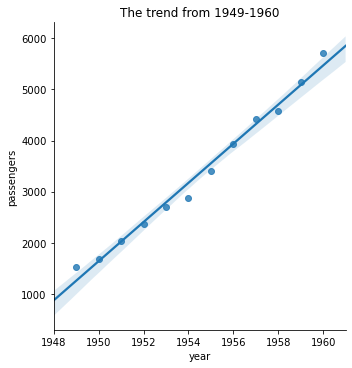

In [2]:
sns.lmplot(x="year",y="passengers",data=flights,
           truncate=False,facet_kws={'xlim':(1948,1961)})
plt.title("The trend from 1949-1960");

To test this idea, we can try using the data from 1949-1959 to predict the number of passengers in 1960. 
In the plot, the blue points were used to create the blue trendline, which is close to the true 1960 data in red. 
While a little low, this looks pretty good. 

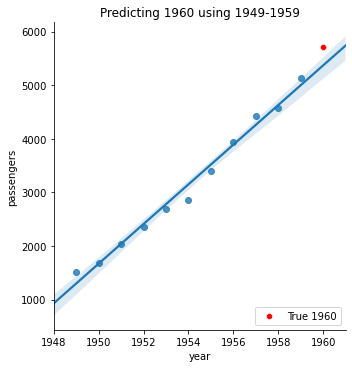

In [3]:
sns.lmplot(x="year",y="passengers",data=flights[flights['year']<=1959],
           truncate=False,facet_kws={'xlim':(1948,1961)})
sns.scatterplot(x="year",y="passengers",data=flights[flights['year']==1960],
                color='red',label='True 1960',legend=False)
plt.legend(loc="lower right")
plt.title("Predicting 1960 using 1949-1959");

However, if we try to predict far in the future, our forecast is no longer any good.
Here is what happens if we only use 1949-1952 to predict 1960.

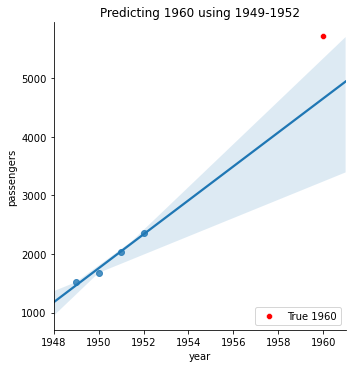

In [4]:
sns.lmplot(x="year",y="passengers",data=flights[flights['year']<1953],
           truncate=False,facet_kws={'xlim':(1948,1961)})
sns.scatterplot(x="year",y="passengers",data=flights[flights['year']==1960],
                color='red',label='True 1960',legend=False)
plt.legend(loc="lower right")
plt.title("Predicting 1960 using 1949-1952");

```{admonition} Thinking Questions
:class: important
* Why does predicting far into the future not work very well?
* How far is too far?
```
